<a href="https://colab.research.google.com/github/qaz027/Dojo_portfolio_project/blob/main/Project1_regs_francis_quimby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    Use the data you have cleaned in previous weeks. 
    Spend time transforming your categorical variables into numbers and use dummy encoding where appropriate.
        Here are some resources to use when dealing with categorical variables:
            Dealing with categorical features in machine learning
            Categorical Data
            Here’s All you Need to Know About Encoding Categorical Data (with Python code)

    Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.  
    Be sure to train test split your data set!
    Build a linear regression model.
    Evaluate your test set results using r2.
    Evaluate your test set results using RMSE
    Which features are most associated with higher predicted sales?

In [2]:
import pandas as pd

infile ='/content/drive/MyDrive/sales_predictions.csv'
sales_pred = pd.read_csv(infile)

#clean and update values 
sales_pred.sort_values(by=['Item_Identifier','Item_Weight'], inplace=True)
sales_pred[['Item_Weight']] = sales_pred['Item_Weight'].fillna(method='pad') #backfill missing item weights
outlet_sz_miss = sales_pred["Outlet_Size"].isna()

sales_pred.sort_values(by=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'], inplace = True)
sales_pred[['Outlet_Size']]=sales_pred['Outlet_Size'].fillna(method='pad')
sales_pred.sort_index(inplace= True)
sales_pred.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Identifier"])["Outlet_Size"].value_counts(dropna=False)
sales_pred['Item_Fat_Content'].replace({'LF':'Low Fat', 'lf':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
sales_pred['Item_Fat_Content'].unique()

print(sales_pred.head())


  Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]


In [3]:
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
sales_pred['Item_Identifier'].unique().shape

(1559,)

In [ ]:
sales_pred['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [4]:
#transform Outlet ID, Outlet Type, Outlet location type, Item ID, Item Fat Content, Outlet_size
#I think Item Weight and Item ID will correlate highly - may be able to simply use weight in the regression?

sales_pred = pd.get_dummies(sales_pred, columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = True)
print(sales_pred.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

In [5]:
from sklearn.model_selection import train_test_split
y = sales_pred['Item_Outlet_Sales']
X = sales_pred.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 36)
(2131, 36)
(6392,)
(2131,)


In [6]:
#Instatiate and Fit model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
# or to predict all values on the training data
train_preds = reg.predict(X_train)
# predict the values in the test set
test_preds = reg.predict(X_test)

In [7]:
#Find R^2 (and RMSE for good measure)
from sklearn.metrics import mean_squared_error
import numpy as np
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,reg.predict(X_train)))
rmse_test = np.sqrt(mean_squared_error(y_test,reg.predict(X_test)))
print('Training RMSE:', rmse_train)
print('Testing RMSE:', rmse_test)

print("R^2 for training set: ", train_score)
print("R^2 for testing set: ", test_score)

Training RMSE: 1139.1176305025365
Testing RMSE: 1092.830326891238
R^2 for training set:  0.5615447211671323
R^2 for testing set:  0.5671301359922962


In [ ]:
reg.coef_

array([  -1.29262227, -422.84482258,   15.72101709,  -18.73756951,
         62.61660111,  -28.29869384,   45.02508172,   27.77118848,
       -106.63579022,   -1.87538169,   45.61273976,   14.34738549,
         26.78362717,    5.38544247,  -12.22601532,  -27.05926919,
        327.74977527,  -21.90762231,  -39.19608557,   41.76796162,
        125.92133547,  298.69082258,  256.7598849 , -504.43347728,
        885.99595126,  293.60045789,   63.5692505 ,  671.33475107,
       -530.4118529 ,  612.34398326, -738.26531873,  655.86053096,
       -292.34995185,  922.7047646 ,  256.7598849 ,  885.99595126])

In [ ]:
print(X.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Ou

In [ ]:
reg.intercept_

36619.37299699216

In [ ]:
reg.coef_


array([  -1.29262227, -422.84482258,   15.72101709,  -18.73756951,
         62.61660111,  -28.29869384,   45.02508172,   27.77118848,
       -106.63579022,   -1.87538169,   45.61273976,   14.34738549,
         26.78362717,    5.38544247,  -12.22601532,  -27.05926919,
        327.74977527,  -21.90762231,  -39.19608557,   41.76796162,
        125.92133547,  298.69082258,  256.7598849 , -504.43347728,
        885.99595126,  293.60045789,   63.5692505 ,  671.33475107,
       -530.4118529 ,  612.34398326, -738.26531873,  655.86053096,
       -292.34995185,  922.7047646 ,  256.7598849 ,  885.99595126])

       **Variables with coefficients > 0:**
       'Item_MRP'
       'Item_Fat_Content_Regular'
       'Item_Type_Breakfast'
       'Item_Type_Canned',
       'Item_Type_Fruits and Vegetables'
       'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene'
       'Item_Type_Household', 
       'Item_Type_Seafood'
       'Item_Type_Starchy Foods'
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Size_Medium','Outlet_Location_Type_Tier 2', 
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier


#Dec_Tree
#assign train test split sets - model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dec_tree = DecisionTreeRegressor(random_state = 42)
#Fit model
dec_tree.fit(X_train, y_train)

train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

# What was the depth of our default tree?
print("the depth of the decision tree model is: ", dec_tree.get_depth())
# How many leaf nodes?
print("number of leaf nodes: ", dec_tree.get_n_leaves())


1.0
0.1495176480850593
the depth of the decision tree model is:  45
number of leaf nodes:  6239


In [9]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)


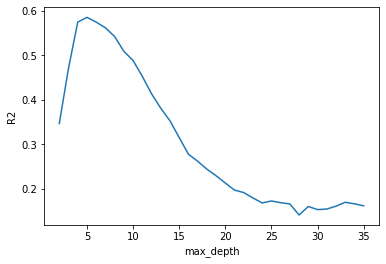

In [11]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


In [12]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)
print("the depth of the decision tree model is: ", dec_tree_5.get_depth())
print("number of leaf nodes: ", dec_tree_5.get_n_leaves())

0.6120592876176956
0.5852963972683265
the depth of the decision tree model is:  5
number of leaf nodes:  32


# Bagged Regression

In [14]:
#bagging regressor
bagreg = BaggingRegressor(random_state = 42)


In [15]:
bagreg.fit(X_train, y_train)

bagreg.predict(X_test)
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)

print("R^2 for training set: ", bagreg_train_score)
print("R^2 for testing set: ", bagreg_test_score)

R^2 for training set:  0.9175873928070548
R^2 for testing set:  0.5237995220131058


# Random Forest

In [16]:
#random forest = rf
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print("R^2 for training set: ", rf_train_score)
print("R^2 for testing set: ", rf_test_score)

R^2 for training set:  0.93780943072032
R^2 for testing set:  0.5536440770498101


In [25]:
rf_6 = RandomForestRegressor(max_depth = 6, random_state = 42)
rf_6.fit(X_train, y_train)
rf_6_train_score = rf_6.score(X_train, y_train)
rf_6_test_score = rf_6.score(X_test, y_test)
print(rf_6_train_score)
print(rf_6_test_score)



0.6382091709058353
0.6031584627027995
